# Propiedades dieléctricas de materiales 

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [388]:
PLT18CO=np.loadtxt('PLT18CO.DAT') 
PLT18CC=np.loadtxt('PLT18CC.DAT') 

PLT22CO=np.loadtxt('PLT22CO.DAT') 
PLT22CC=np.loadtxt('PLT22CC.DAT')

template=pd.read_csv('template.csv')

Cols=template.keys()
Cols= [s.replace('K', 'k') for s in Cols]

PLT18CO=pd.DataFrame(PLT18CO, columns=Cols)
PLT18CC=pd.DataFrame(PLT18CC, columns=Cols)
PLT22CO=pd.DataFrame(PLT22CO, columns=Cols)
PLT22CC=pd.DataFrame(PLT22CC, columns=Cols)

In [389]:
PLT22CO.describe()

,e'100Hz,e'200Hz,e'300Hz,e'500Hz,e'700Hz,e'1kHz,e'2kHz,e'3kHz,e'5kHz,e'7kHz,...,e''300kHz,e''500kHz,e''700kHz,e''1MHz,e''2MHz,e''3MHz,e''5MHz,e''7MHz,e''10MHz,temp
count,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000
mean,1.025701e-08,3.108076e-08,3.906262e-08,3.226543e-08,4.599639e-08,4.653594e-08,6.470150e-08,8.281587e-08,1.250259e-07,2.031813e-07,...,0.000883,0.001466,0.002047,0.002915,0.005783,0.008615,0.014123,0.019355,0.026538,74.71300
std,2.484959e-07,6.205238e-07,7.363140e-07,4.289067e-07,6.345973e-07,4.360487e-07,3.856079e-07,4.894460e-07,7.874427e-07,5.741003e-07,...,0.000928,0.001546,0.002163,0.003087,0.006154,0.009190,0.015111,0.020747,0.028672,73.71103
min,-9.183920e-09,-2.587280e-09,-6.173440e-09,-1.842430e-09,-4.559080e-09,-3.358790e-09,-4.670000e-08,-1.229020e-07,-3.057720e-07,-1.735180e-07,...,0.000010,0.000024,0.000014,0.000019,0.000052,0.000044,0.000067,0.000088,0.000117,24.10000
25%,-8.576545e-10,3.645758e-09,6.466188e-09,1.156377e-08,1.647030e-08,2.428578e-08,4.567037e-08,6.322493e-08,8.395755e-08,1.150180e-07,...,0.000487,0.000806,0.001124,0.001598,0.003158,0.004697,0.007678,0.010499,0.014303,26.10000
50%,-4.560110e-10,4.109900e-09,6.985030e-09,1.217160e-08,1.737100e-08,2.549755e-08,4.770415e-08,6.661140e-08,1.069300e-07,1.804065e-07,...,0.000517,0.000855,0.001192,0.001694,0.003351,0.004983,0.008150,0.011145,0.015186,35.60000
75%,-2.137413e-11,5.551660e-09,9.119417e-09,1.545003e-08,2.156055e-08,3.159170e-08,5.809230e-08,8.016847e-08,1.280635e-07,2.146687e-07,...,0.000729,0.001208,0.001683,0.002390,0.004725,0.007048,0.011541,0.015851,0.021673,93.82500
max,6.085160e-06,1.520440e-05,1.804370e-05,1.051670e-05,1.555970e-05,1.069630e-05,9.429610e-06,1.192220e-05,1.911310e-05,1.360200e-05,...,0.005314,0.008846,0.012370,0.017645,0.035130,0.052416,0.086056,0.117972,0.162818,295.10000


vamos a graficar sólo para las frecuencias: (1k, 10k, 100k, 1M) Hz 

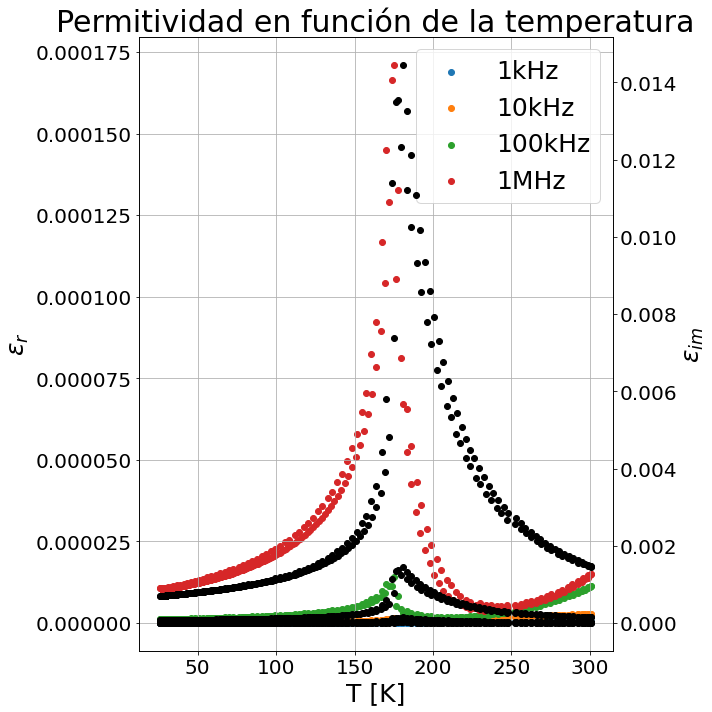

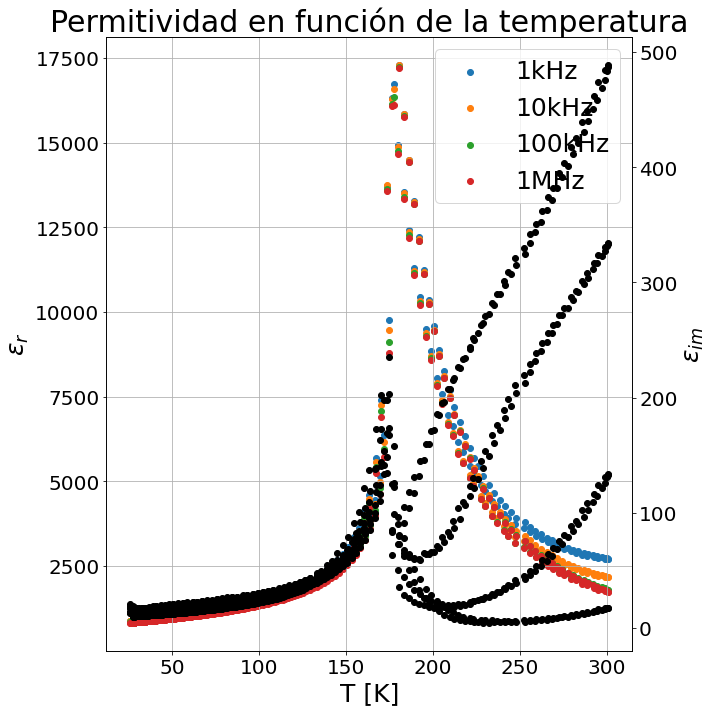

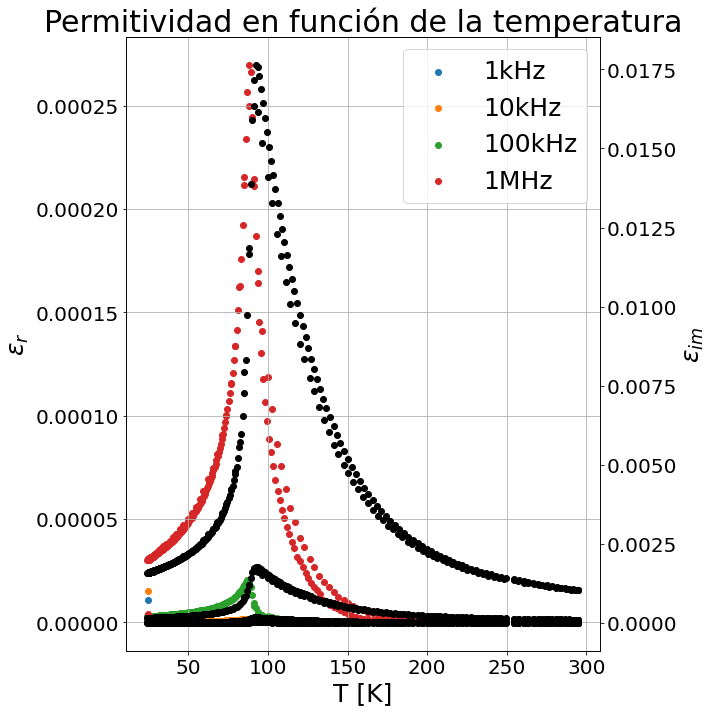

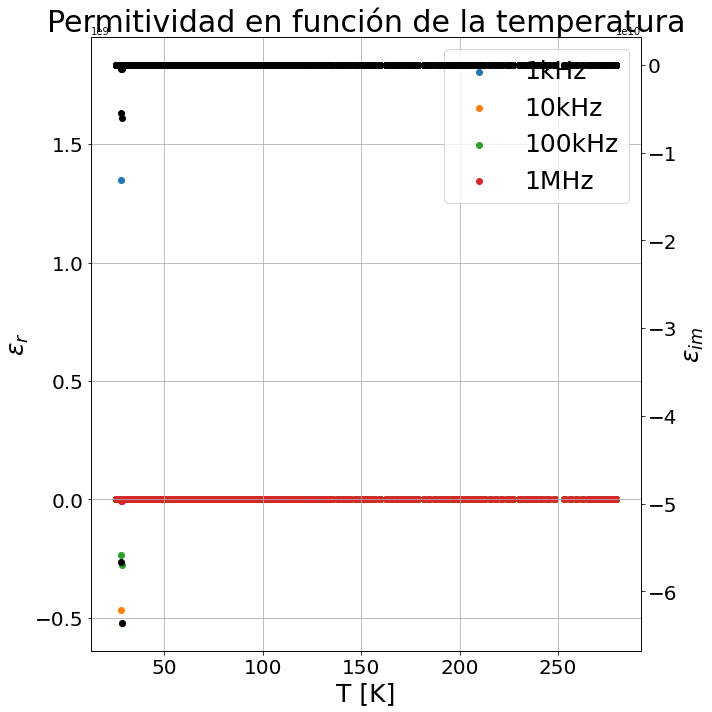

In [382]:
U=[PLT18CO, PLT18CC , PLT22CO, PLT22CC]

for u in U: 
    
    H=['1k','10k', '100k', '1M']
    
    fig, ax=plt.subplots(1,1, figsize=(10,10))

    ax2=ax.twinx()  #comando para usar dos ejes en el mismo gráfico. 

    for i in H:  
        ax.scatter(u["temp"],u["e'{}Hz".format(i)], label="{}Hz".format(i)) 
        ax2.scatter(u["temp"],u["e''{}Hz".format(i)], c='k')

    ax.set_xlabel('T [K]', fontsize=25)
    ax.set_ylabel(r'$\epsilon_r$', fontsize=25)
    ax2.set_ylabel(r'$\epsilon_{im}$', fontsize=25)
    ax.set_title(r'Permitividad en función de la temperatura', fontsize=30)

    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    ax.grid()
    ax.legend(loc='best', fontsize=25)
    plt.tight_layout()  


   
plt.show()

En los datos vemos que hay datos de bajada y subida. Vamos a elegir sólo los de subida. Además trabajaremos solo con las copias.

Vamos ahora a realizar el ajuste de la curva de la parte rela de la permitividad usando la ecuación de santo-seiras. 

In [383]:
def epsilon_r(T, Delta, xi, a):  
    return epsilon_m/(1+(np.abs(T-(T_m+a))/Delta)**xi)

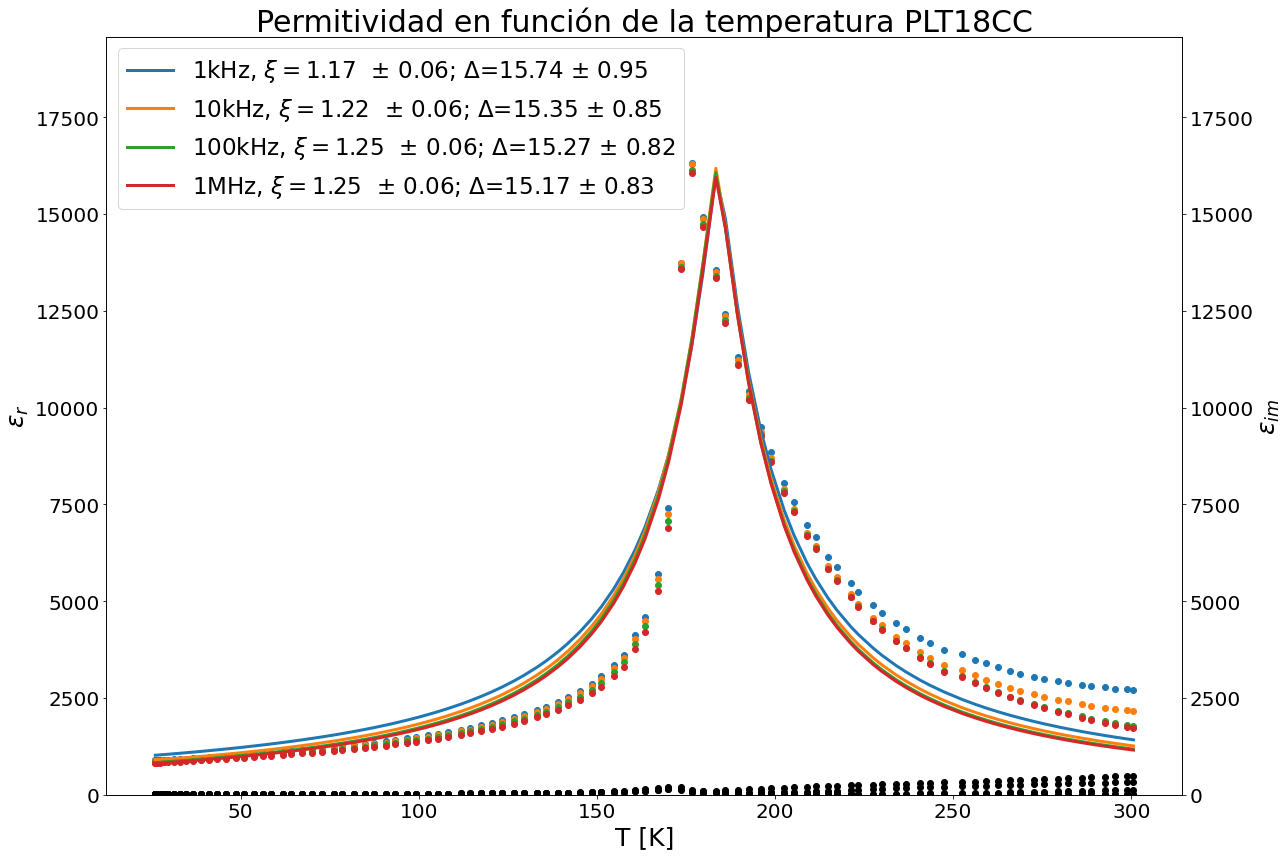

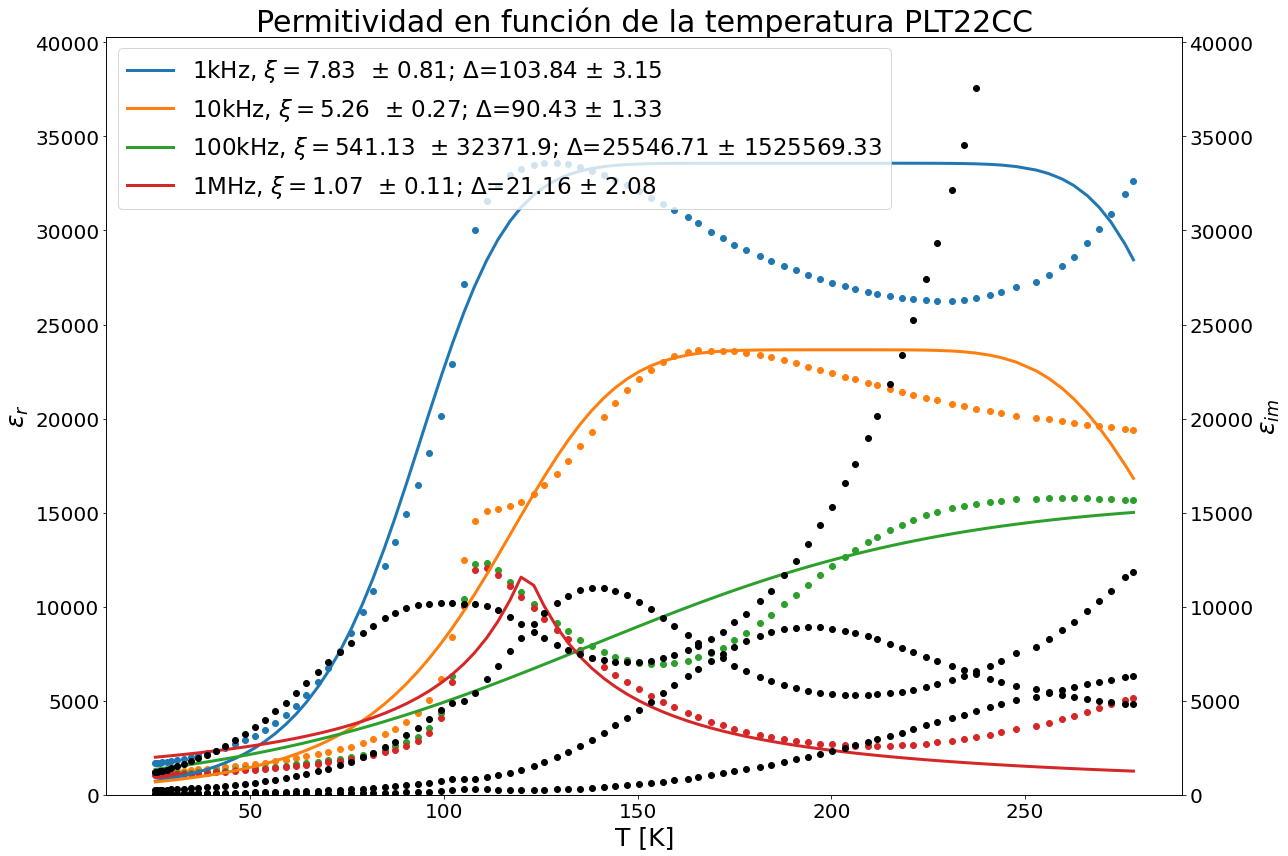

In [384]:
#Los parámetros que queremos ajustan en la función de santo-seiras son dos \Delta y \xi.

#mej_val entrega los valores ajustados en el orden que aparecen en la función.

#cov es la matriz de covarianza de los parámetros ajustados, el error es la raiz cuadrada de los elementos diagonales

U=[PLT18CC ,PLT22CC]
H=['1k','10k', '100k', '1M']
Name=['PLT18CC', 'PLT22CC']

Delta0=65
xi0=1.5
a=20

Cont=0
for u in U:
    

    fig, ax=plt.subplots(1,1, figsize=(18,12))
    ax2=ax.twinx()  #comando para usar dos ejes en el mismo gráfico.
    A=u['temp'].index[u['temp']==max(u['temp'])][0]
    T=u["temp"][0:A]

    Max=max(u["e'1kHz".format(i)][0:A]) #para que se vean todos los gráficos con el mismo rango en el eje y.

    for i in H:
        

        epsilonr=u["e'{}Hz".format(i)][0:A]

        epsilon_m=max(epsilonr)
        if epsilon_m>Max:
            Max=epsilon_m

        ind=epsilonr.index[epsilonr==epsilon_m][0]
        T_m=T[ind]


        ax.set_ylim(0, Max*1.2)
        ax.scatter(T,epsilonr)
        ax2.set_ylim(0, Max*1.2)
        ax2.scatter(T,u["e''{}Hz".format(i)][0:A], c='k')

        mej_val, cov = curve_fit(epsilon_r,T,epsilonr, [Delta0, xi0, a])
        ajust=epsilon_r(T, mej_val[0], mej_val[1], mej_val[2])


        xi=np.round(mej_val[1],2)
        dxi=np.round(np.sqrt(cov[1][1]),2)
        delta=np.round(mej_val[0],2)
        ddelta=np.round(np.sqrt(cov[0][0]),2)   

        ax.plot(T, ajust, label=r"{}Hz, $\xi=${}  $\pm$ {}; $\Delta$={} $\pm$ {}".format(i, xi, dxi, delta, ddelta), lw=3)
        ax.set_xlabel('T [K]', fontsize=25)
        ax.set_ylabel(r'$\epsilon_r$', fontsize=25)
        ax2.set_ylabel(r'$\epsilon_{im}$', fontsize=25)
        ax.set_title(r'Permitividad en función de la temperatura {}'.format(Name[Cont]), fontsize=30)
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        ax2.tick_params(axis='y', labelsize=20)
        ax.grid()
        ax.legend(loc='best', fontsize=23)
        plt.tight_layout()  
        
    Cont+=1
plt.show()

En la última gráfica podemos ver que hay curvas de pérdida, por lo tanto, para tener el caso ideal vamos a cortar los datos en dónde inicia el comportamiento anormal

0
1
2
3


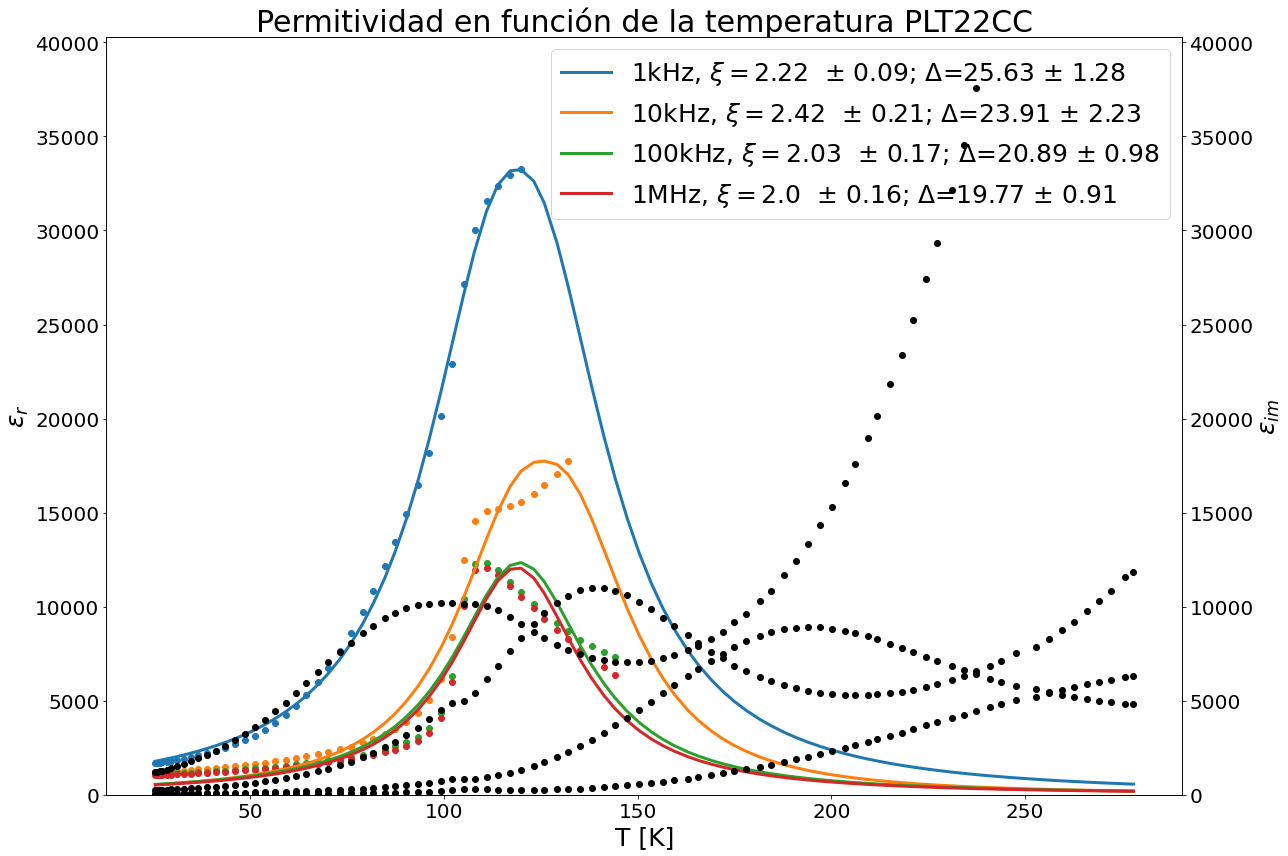

In [436]:
#Los parámetros que queremos ajustan en la función de santo-seiras son dos \Delta y \xi.
#mej_val entrega los valores ajustados en el orden que aparecen en la función.
#cov es la matriz de covarianza de los parámetros ajustados, el error es la raiz cuadrada de los elementos diagonales


T1k=T.index[T==123.2][0]
T10k=T.index[T==135.2][0]
T100k=T.index[T==147.3][0]
T1M=T.index[T==147.3][0]

TT=[T1k, T10k, T100k, T1M]

U=[PLT22CC]

H=['1k','10k', '100k', '1M']

Delta0=65
xi0=1.5
a=10

for u in U:

    fig, ax=plt.subplots(1,1, figsize=(18,12))
    ax2=ax.twinx()  #comando para usar dos ejes en el mismo gráfico.

    Max=max(u["e'1kHz".format(i)][0:A]) #para que se vean todos los gráficos con el mismo rango en el eje y.

    cont=0
    
    for i in H:

        print(cont)

        t=T[0: TT[cont] ]
        epsilonr=u["e'{}Hz".format(i)][0: TT[cont]]

        epsilon_m=max(epsilonr)
        if epsilon_m>Max:
            Max=epsilon_m

        ind=epsilonr.index[epsilonr==epsilon_m][0]
        T_m=T[ind]


        ax.set_ylim(0, Max*1.2)
        ax.scatter(t,epsilonr)
        ax2.set_ylim(0, Max*1.2)
        ax2.scatter(T,u["e''{}Hz".format(i)][0:A], c='k')

        mej_val, cov = curve_fit(epsilon_r,t,epsilonr, [Delta0, xi0, a])
        ajust=epsilon_r(T, mej_val[0], mej_val[1], mej_val[2])


        xi=np.round(mej_val[1],2)
        dxi=np.round(np.sqrt(cov[1][1]),2)
        delta=np.round(mej_val[0],2)
        ddelta=np.round(np.sqrt(cov[0][0]),2)   

        ax.plot(T, ajust, label=r"{}Hz, $\xi=${}  $\pm$ {}; $\Delta$={} $\pm$ {}".format(i, xi, dxi, delta, ddelta), lw=3)
        ax.set_xlabel('T [K]', fontsize=25)
        ax.set_ylabel(r'$\epsilon_r$', fontsize=25)
        ax2.set_ylabel(r'$\epsilon_{im}$', fontsize=25)
        ax.set_title(r'Permitividad en función de la temperatura {}'.format(Name[1]), fontsize=30)
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        ax2.tick_params(axis='y', labelsize=20)
        ax.grid()
        ax.legend(loc='best', fontsize=25)
        plt.tight_layout() 
    
        cont+=1
plt.show()

## vamos a linearlizar las curvas asociadas al sistema PLT18CC usando la ecuación de Curie-Weiss y las del sistema PLT20CC aplicando logaritmo  natural. 

Vamos primero a cortar el dataframe original de PLT18CC y PLT20CC para quedarnos con los datos de subida, con las copias y con los datos de las frecuencias que nos interesan.

In [367]:
A=PLT18CC['temp'].index[PLT18CC['temp']==max(PLT18CC['temp'])][0]
colm=['temp', 'e\'1kHz', 'e\'10kHz', 'e\'100kHz', 'e\'1MHz', 'e\'\'1kHz', 'e\'\'10kHz', 'e\'\'100kHz', 'e\'\'1MHz']
newPLT18CC=PLT18CC.loc[0:A][colm]
newPLT18CC.describe()

,temp,e'1kHz,e'10kHz,e'100kHz,e'1MHz,e''1kHz,e''10kHz,e''100kHz,e''1MHz
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,152.284536,3559.339004,3399.622194,3298.194422,3254.739263,148.428341,99.284546,44.100995,31.643955
std,85.652214,3374.067967,3363.354814,3355.815778,3346.586625,150.564223,97.957332,33.964456,34.991664
min,26.100000,889.959503,868.908499,845.748587,825.456886,17.632715,16.830806,13.629835,6.238764
25%,76.200000,1231.855032,1203.030105,1167.749918,1135.546214,25.648948,25.116128,20.550554,12.743545
50%,148.600000,2714.232240,2219.995425,1970.972811,1931.329611,71.781328,58.695858,29.850818,17.665324
75%,223.400000,4122.916655,3916.322143,3804.961763,3772.423633,252.206209,145.139815,55.146774,35.056324
max,300.900000,16316.074970,16283.346419,16150.408998,16071.503439,488.906227,334.545292,140.683971,198.156496


### 4. Determinar la bondad del ajuste.


In [ ]:
def r_sqr(datexp,dataj):
    return 1-sum((datexp-dataj)**2)/sum((datexp-mean(datexp))**2)

print('R^2 = ', r_sqr(y,yaj))


R^2 =  0.9910442934462885
